# A304_SRO_NGO_Hall_123K_p1T_to_n1T

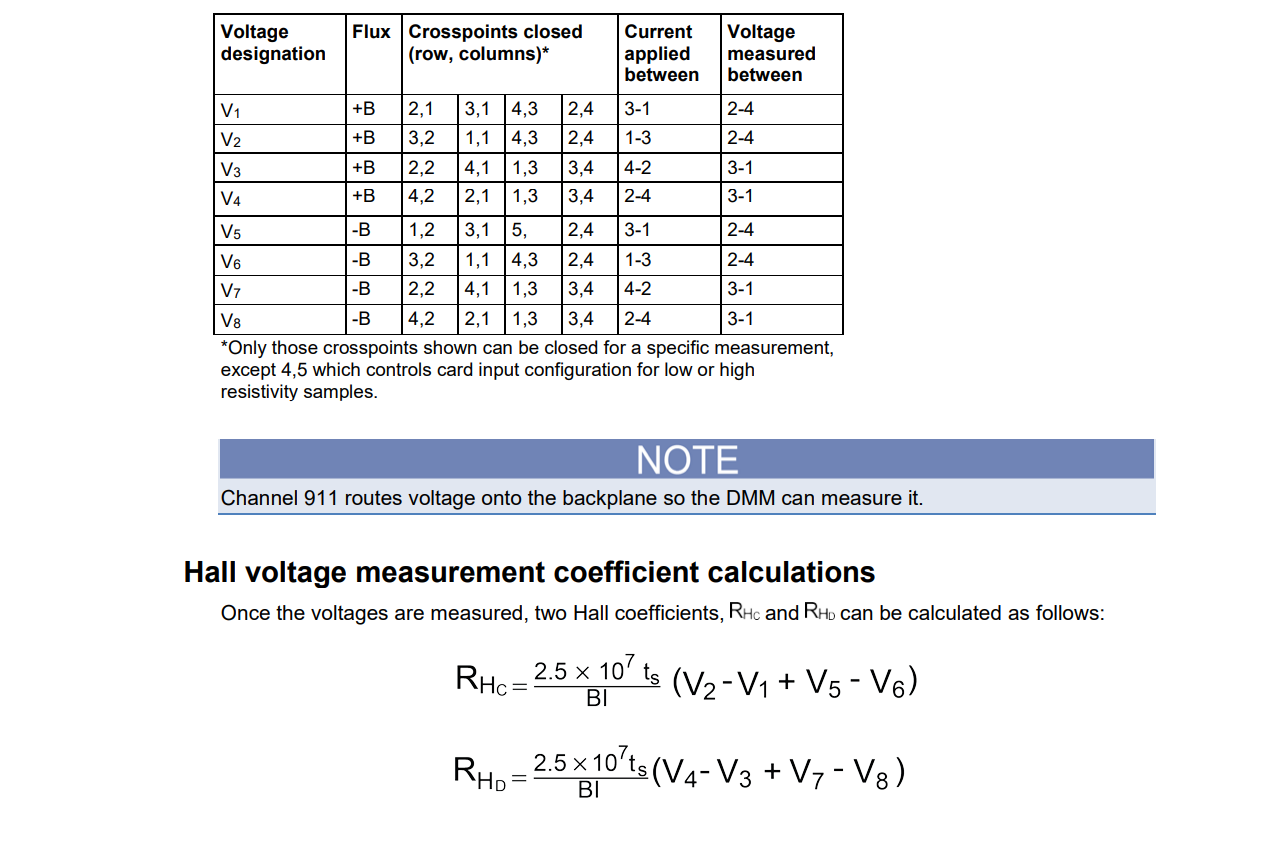

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
filename='C:\\Users\\Admin\\Desktop\\Data\\21june2023\\A304_123K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.266699,122.978272,-131.169033,131.132261,144.225491,-144.184055,6.448000e-07,1000000
1,0.001,9000.496973,123.001830,-129.882668,129.881873,143.660327,-143.637425,6.351000e-07,1000000
2,0.001,8000.525854,122.997831,-128.654166,128.637936,143.117746,-143.057028,6.610000e-07,1000000
3,0.001,7000.447095,122.999468,-127.414377,127.420160,142.547407,-142.488917,6.726000e-07,1000000
4,0.001,6000.417505,123.000080,-126.212213,126.190466,141.932064,-141.898941,6.696000e-07,1000000
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.464038,123.000604,-126.179357,126.171322,141.962294,-141.937246,6.599000e-07,1000000
62,0.001,7000.239917,123.000407,-127.436008,127.413445,142.557493,-142.501893,6.502000e-07,1000000
63,0.001,8000.325024,123.000438,-128.645270,128.661458,143.109156,-143.074769,6.531000e-07,1000000
64,0.001,9000.474072,123.000547,-129.889683,129.890278,143.690899,-143.640491,6.552000e-07,1000000


In [4]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [5]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [6]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.266699,10000,122.978272,131.169033,-131.132261,-144.225491,144.184055,6.448000e-07,1000000
1,0.001,9000.496973,9000,123.001830,129.882668,-129.881873,-143.660327,143.637425,6.351000e-07,1000000
2,0.001,8000.525854,8000,122.997831,128.654166,-128.637936,-143.117746,143.057028,6.610000e-07,1000000
3,0.001,7000.447095,7000,122.999468,127.414377,-127.420160,-142.547407,142.488917,6.726000e-07,1000000
4,0.001,6000.417505,6000,123.000080,126.212213,-126.190466,-141.932064,141.898941,6.696000e-07,1000000


In [7]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

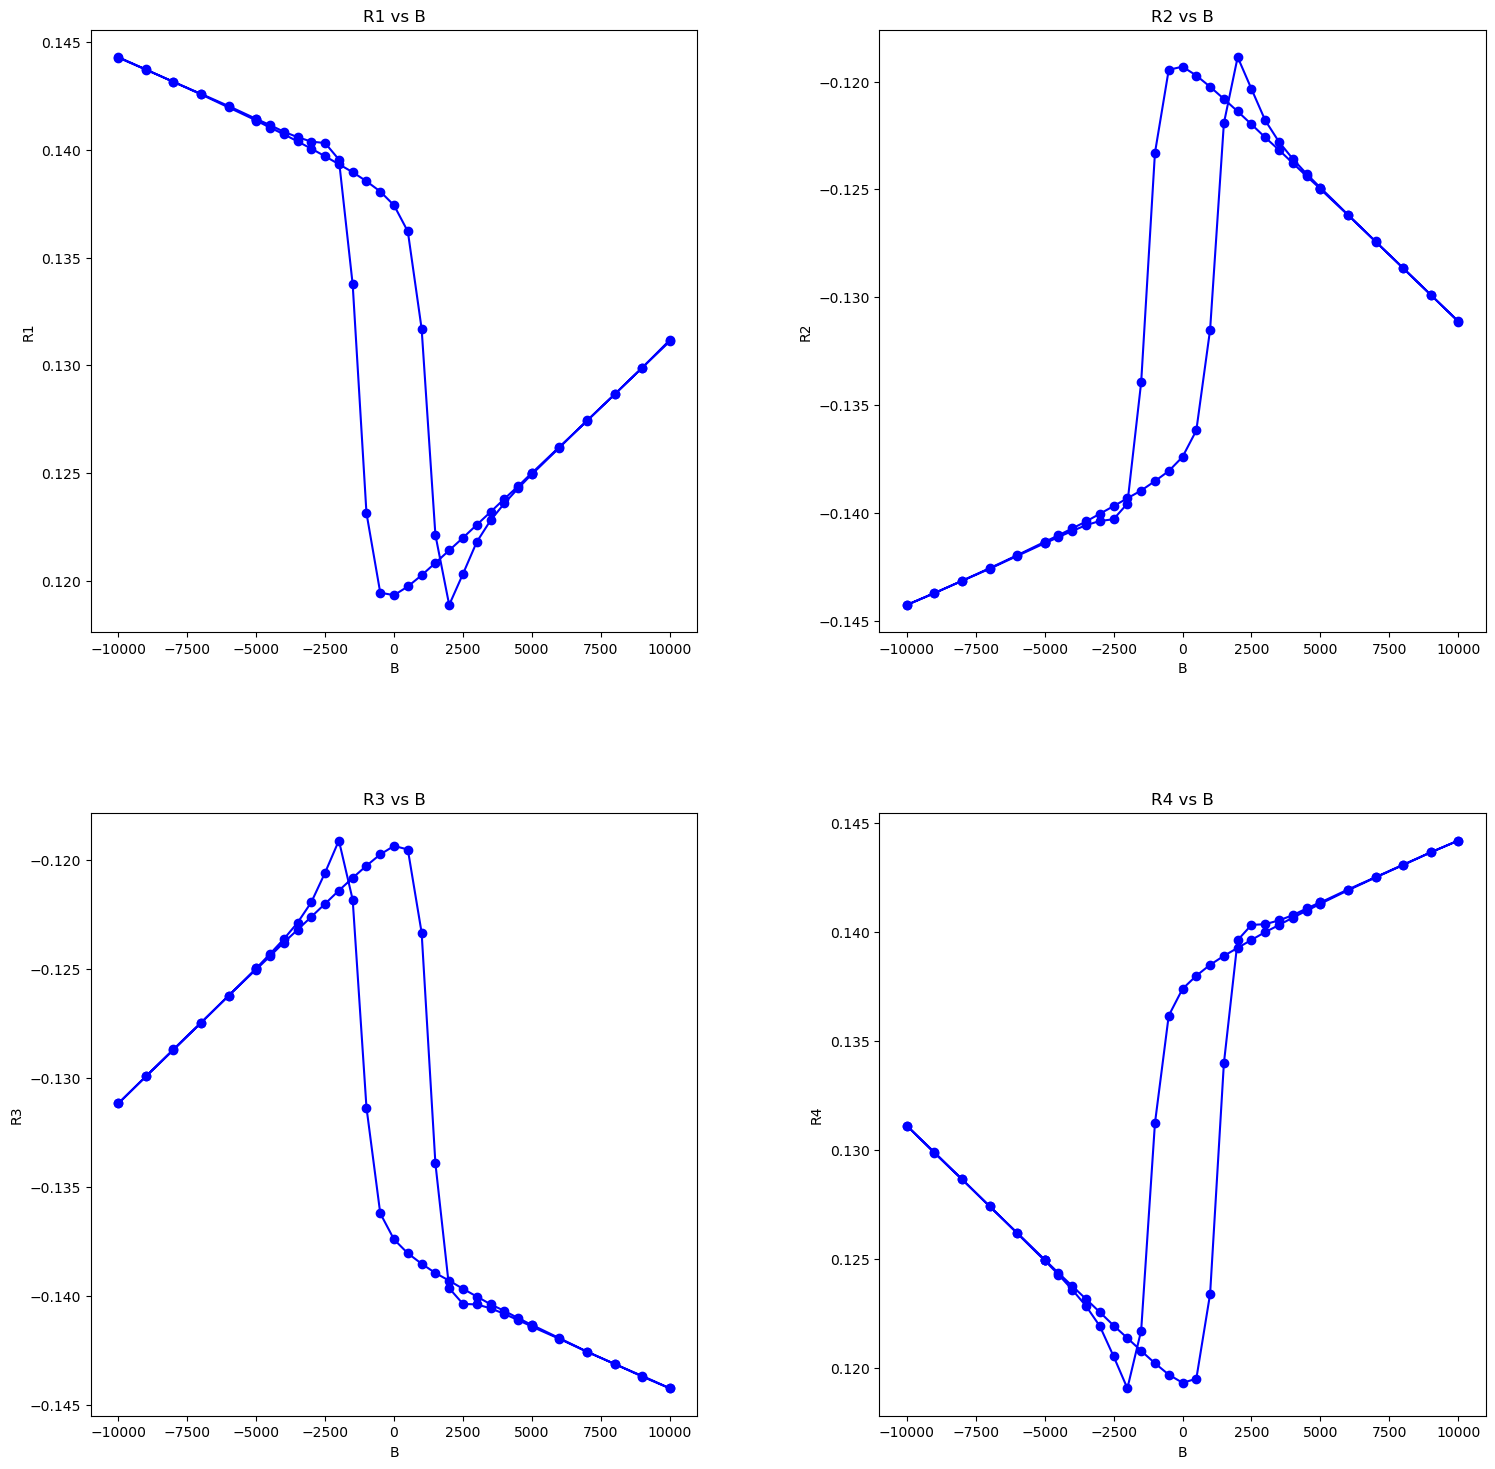

In [8]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [9]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [10]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [11]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [12]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.266699,10000,122.978272,131.169033,-131.132261,-144.225491,144.184055,6.448000e-07,1000000
1,0.001,9000.496973,9000,123.001830,129.882668,-129.881873,-143.660327,143.637425,6.351000e-07,1000000
2,0.001,8000.525854,8000,122.997831,128.654166,-128.637936,-143.117746,143.057028,6.610000e-07,1000000
3,0.001,7000.447095,7000,122.999468,127.414377,-127.420160,-142.547407,142.488917,6.726000e-07,1000000
4,0.001,6000.417505,6000,123.000080,126.212213,-126.190466,-141.932064,141.898941,6.696000e-07,1000000


In [13]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.550781,-10000,123.000499,144.311169,-144.274253,-131.167294,131.113881,6.335000e-07,1000000
34,0.001,-9000.378369,-9000,123.000375,143.736252,-143.730417,-129.921674,129.855880,6.303000e-07,1000000
35,0.001,-8000.444312,-8000,123.000694,143.160770,-143.154726,-128.680549,128.649126,6.332000e-07,1000000
36,0.001,-7000.345239,-7000,123.000192,142.579846,-142.571953,-127.459061,127.411238,6.442000e-07,1000000
37,0.001,-6000.357080,-6000,123.000430,141.974997,-141.970058,-126.220815,126.205994,6.530000e-07,1000000


In [14]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [15]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,122.978272,131.169033,-131.132261,-144.225491,144.184055,144.311169,-144.274253,-131.167294,131.113881,1000000
1,0.001,9000,123.001830,129.882668,-129.881873,-143.660327,143.637425,143.736252,-143.730417,-129.921674,129.855880,1000000
2,0.001,8000,122.997831,128.654166,-128.637936,-143.117746,143.057028,143.160770,-143.154726,-128.680549,128.649126,1000000
3,0.001,7000,122.999468,127.414377,-127.420160,-142.547407,142.488917,142.579846,-142.571953,-127.459061,127.411238,1000000
4,0.001,6000,123.000080,126.212213,-126.190466,-141.932064,141.898941,141.974997,-141.970058,-126.220815,126.205994,1000000


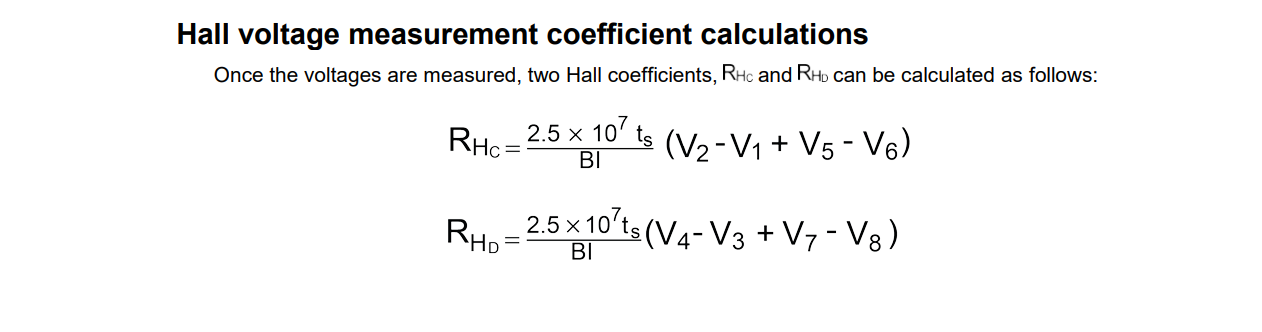
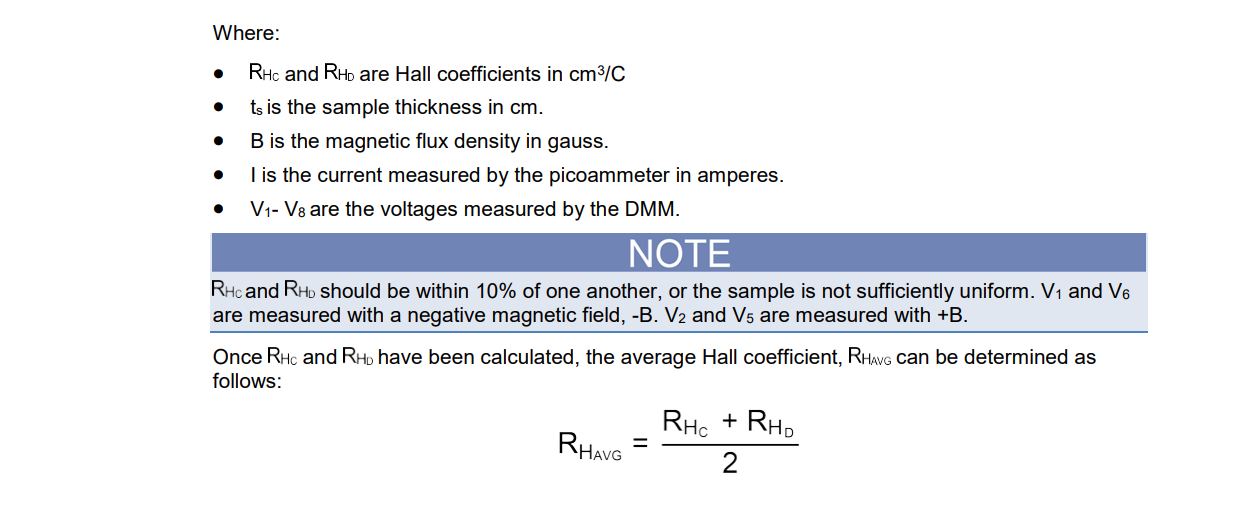

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [16]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

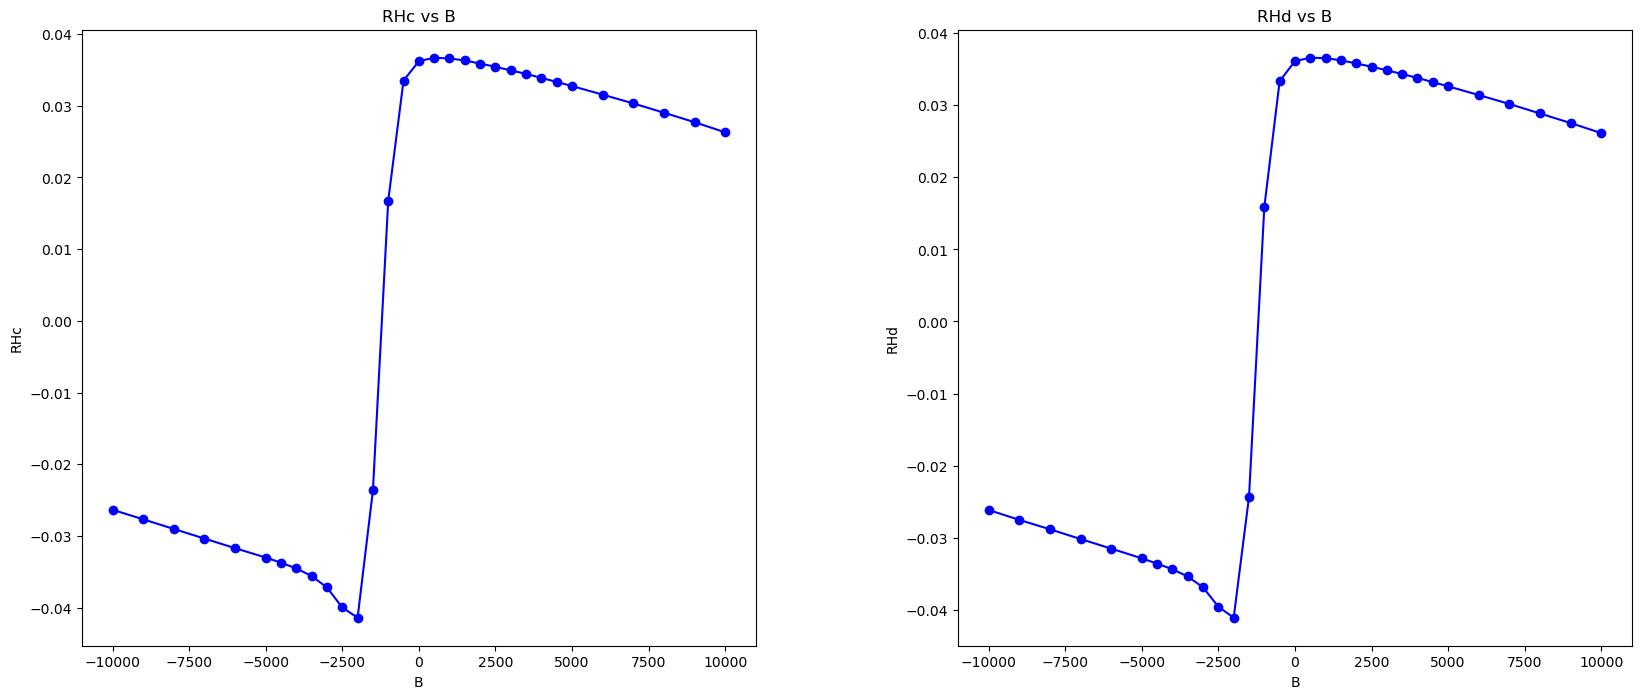

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

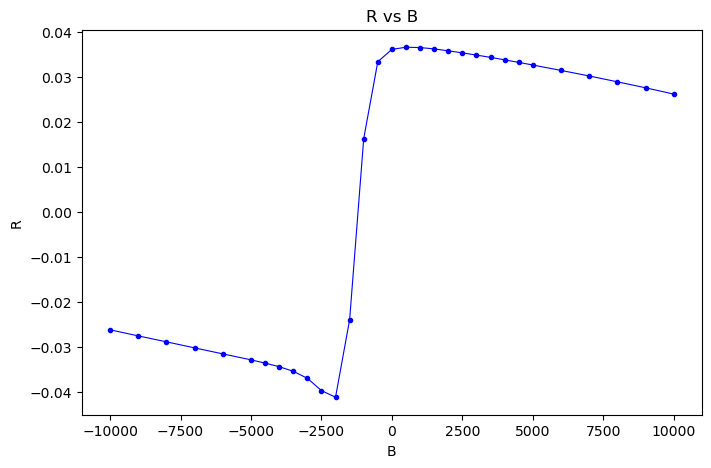

In [18]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [19]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,123.000499,144.311169,-144.274253,-131.167294,131.113881,131.169033,-131.132261,-144.225491,144.184055,1000000
1,0.001,-9000,123.000375,143.736252,-143.730417,-129.921674,129.855880,129.882668,-129.881873,-143.660327,143.637425,1000000
2,0.001,-8000,123.000694,143.160770,-143.154726,-128.680549,128.649126,128.654166,-128.637936,-143.117746,143.057028,1000000
3,0.001,-7000,123.000192,142.579846,-142.571953,-127.459061,127.411238,127.414377,-127.420160,-142.547407,142.488917,1000000
4,0.001,-6000,123.000430,141.974997,-141.970058,-126.220815,126.205994,126.212213,-126.190466,-141.932064,141.898941,1000000


### Hall resistance calculation

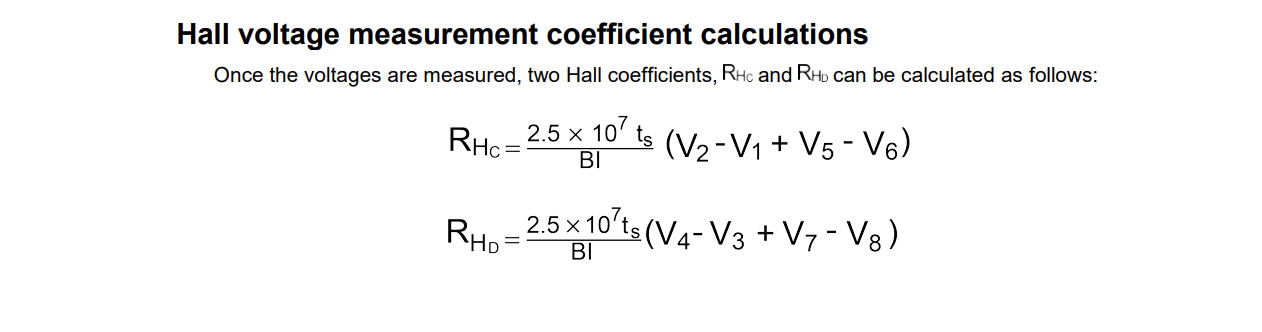

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [20]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

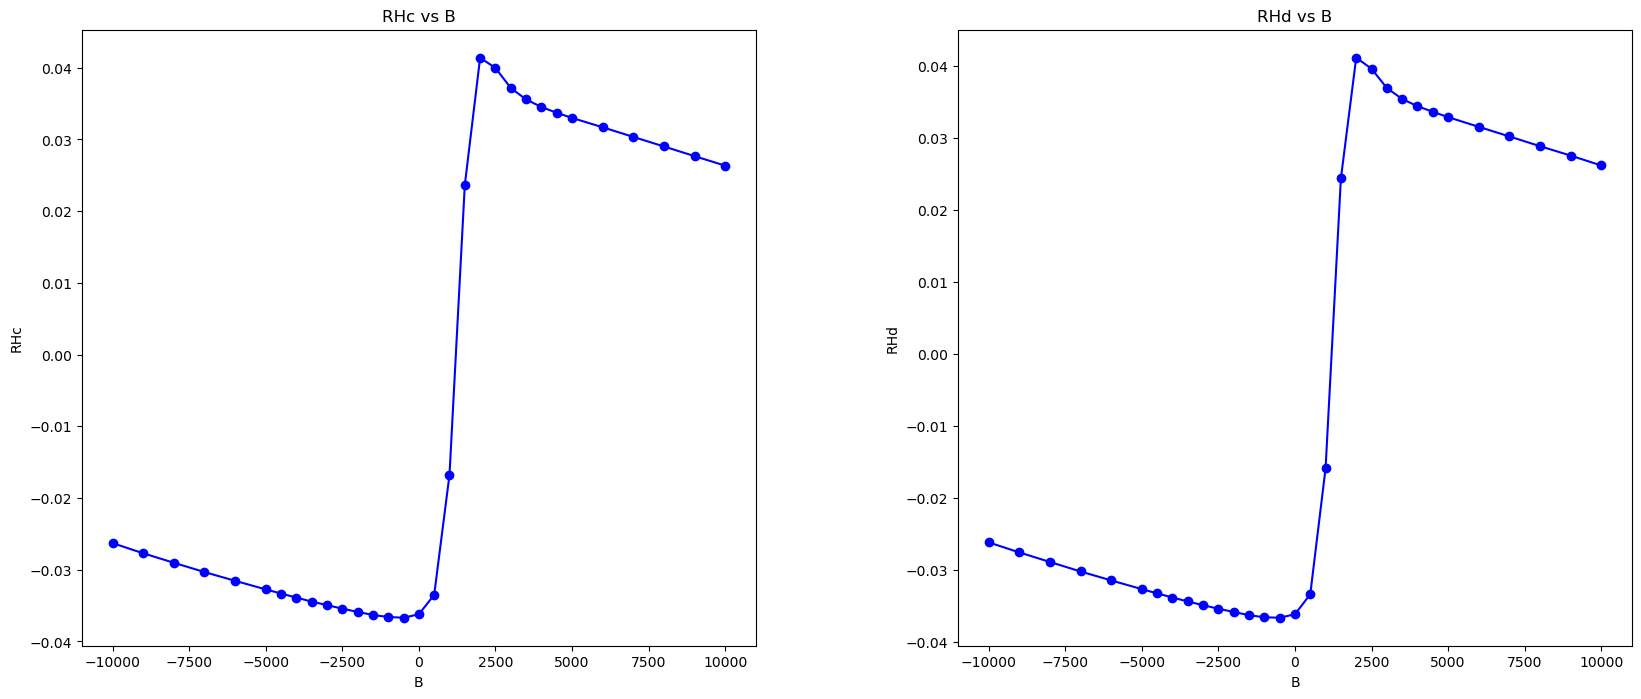

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

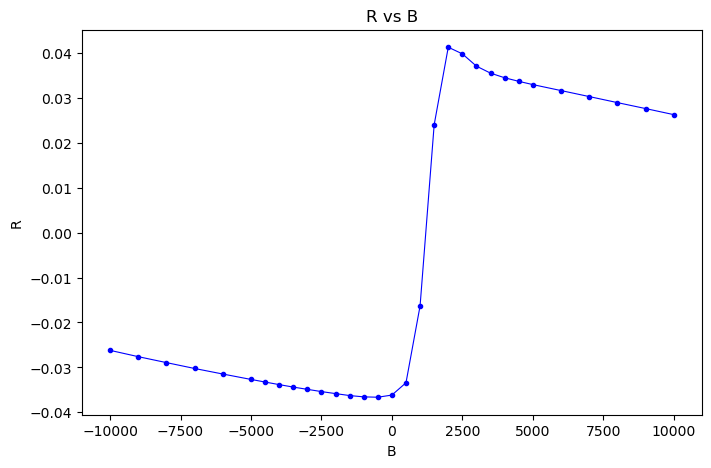

In [22]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

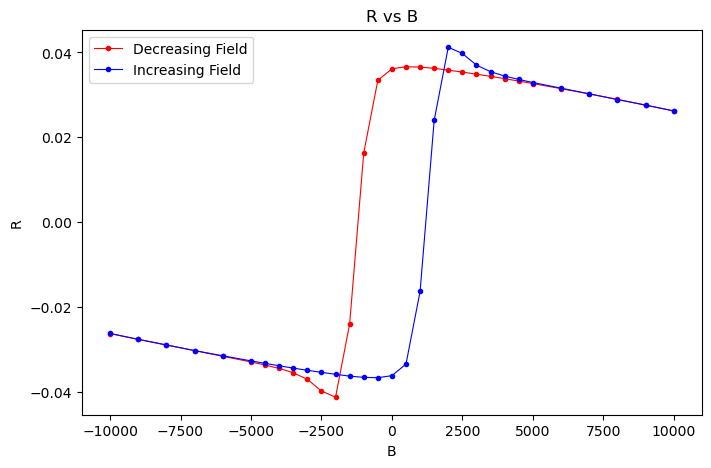

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [24]:
data.to_pickle("./pickle_data/123K_dec.pkl")
data2.to_pickle("./pickle_data/123K_inc.pkl")